## Segmenting and Clustering Neighborhoods in Barcelona For Nusret Steak 

In [3]:
import numpy as numpy
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json

'''Run fist with pips for dowloanding package later comment them'''

!conda install -c conda-forge geopy --yes
!pip install lxml
!pip install wikipedia
!pip install geocoder

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors
## import k-means from clustering stage
from sklearn.cluster import KMeans
import lxml
import folium # map rendering library
import wikipedia
import geocoder
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         394 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.

### Get data from Wikipedia

In [4]:

html = wikipedia.page("Districts_of_Barcelona").html()

df = pd.read_html(html)[3]
df =df[["Number","District","Neighbourhoods"]]

df
df.head()     

,Number,District,Neighbourhoods
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs..."
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes"
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B..."


In [5]:
df.shape

(10, 3)

### Get Cordinates From Geolocation Api For Barcelona and its Districts

In [72]:

import geocoder # import geocoder

address = 'BARCELONA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
b_latitude=location.latitude
b_longitude= location.longitude

print('The geograpical coordinate of {} are {}, {}.'.format(address,location.latitude, location.longitude))

The geograpical coordinate of BARCELONA are 41.3828939, 2.1774322.


In [73]:

import geocoder # import geocoder
latitude=[]
longitude=[]
for district in df["District"]:
    address = district

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
df["Longitude"]=longitude
df["Latitude"]=latitude
df

,Number,District,Neighbourhoods,Longitude,Latitude
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",2.173269,41.374962
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",2.163655,41.393689
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs...",2.133347,41.340234
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes",2.121718,41.388452
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",2.107620,41.413039
5,6,Gràcia,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ...",21.987713,38.995368
6,7,Horta-Guinardó,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",2.143597,41.428540
7,8,Nou Barris,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",2.172565,41.446727
8,9,Sant Andreu,"Baró de Viver, Bon Pastor, El Congrés i els In...",2.196859,41.437439
9,10,Sant Martí,"El Besòs i el Maresme, el Clot, El Camp de l'A...",2.203655,41.406782


### Visualize Data In Map

###### Create Maps For Barcelona

In [74]:
barcelona_map = folium.Map(location=[b_latitude, b_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.55,
        parse_html=False).add_to(barcelona_map)  
    
barcelona_map

### Define Foursquare Credentials and Version

In [75]:
CLIENT_ID = 'BAYOAKJAHLKHPNQKFTWSUJC5OQMIWVLDPZNXDVEM4JY2S352' 
CLIENT_SECRET = '4NR5BVY1EVWON2EVK1QH0U15POEDAJXGEK3PSTNR01XE2GMN' 
VERSION = '21062020' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BAYOAKJAHLKHPNQKFTWSUJC5OQMIWVLDPZNXDVEM4JY2S352
CLIENT_SECRET:4NR5BVY1EVWON2EVK1QH0U15POEDAJXGEK3PSTNR01XE2GMN


In [76]:
District_name = df.loc[0, 'District']
District_latitude = df.loc[0, 'Latitude'] 
District_longitude = df.loc[0, 'Longitude'] 
# limit of number of venues returned by Foursquare API
LIMIT = 100 
radius = 500

District_name

'Ciutat Vella'

In [77]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    District_latitude, 
    District_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()


In [78]:
results

{'meta': {'code': 200, 'requestId': '5ef875b5e771111ff80127ac'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'El Raval',
  'headerFullLocation': 'El Raval, Barcelona',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 50,
  'suggestedBounds': {'ne': {'lat': 41.3794619545, 'lng': 2.179254976456072},
   'sw': {'lat': 41.3704619455, 'lng': 2.167283754326368}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '59f8e8f8efa82a7ff95be2d4',
       'name': 'The Fish & Chips Shop',
       'location': {'address': 'Perecamps,7.',
        'lat': 41.375965,
        'lng': 2.1741521,
        'labeledLatLngs': [{'label': 'display',
          'lat': 41.375965,
          'lng': 2.174

In [80]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [81]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,The Fish & Chips Shop,Bistro,41.375965,2.174152
1,macera,Cocktail Bar,41.375589,2.170493
2,Marea Alta,Seafood Restaurant,41.376484,2.175106
3,Todo Pasa por San Telmo,Argentinian Restaurant,41.373370,2.171455
4,Cassette Bar,Bar,41.377324,2.173629


In [82]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [130]:
s_venues= getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )


Ciutat Vella
Eixample
Sants-Montjuïc
Les Corts
Sarrià-Sant Gervasi
Gràcia
Horta-Guinardó
Nou Barris
Sant Andreu
Sant Martí


In [131]:
s_venues.shape

(344, 7)

In [132]:
s_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ciutat Vella,50,50,50,50,50,50
Eixample,100,100,100,100,100,100
Horta-Guinardó,17,17,17,17,17,17
Les Corts,56,56,56,56,56,56
Nou Barris,8,8,8,8,8,8
Sant Andreu,78,78,78,78,78,78
Sant Martí,23,23,23,23,23,23
Sants-Montjuïc,3,3,3,3,3,3
Sarrià-Sant Gervasi,9,9,9,9,9,9


In [144]:
# one hot encoding
s_onehot = pd.get_dummies(s_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
s_onehot['Neighborhood'] = s_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [s_onehot.columns[-1]] + list(s_onehot.columns[:-1])
s_onehot = s_onehot[fixed_columns]

s_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Café,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Country Dance Club,Cultural Center,Dessert Shop,Diner,Donut Shop,Electronics Store,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food Stand,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Light Rail Station,Lingerie Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,National Park,Noodle House,Outdoor Sculpture,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Plaza,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Stadium,Supermarket,Taco Place,Tapas Restaurant,Tennis Court,Theater,Toy / Game Store,Tram Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Women's Store
0,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ciutat Vella,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [145]:
s_venues.shape

(344, 7)

In [146]:
s_grouped = s_onehot.groupby('Neighborhood').mean().reset_index()
s_grouped

,Neighborhood,Accessories Store,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Café,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Country Dance Club,Cultural Center,Dessert Shop,Diner,Donut Shop,Electronics Store,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food Stand,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,History Museum,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Light Rail Station,Lingerie Store,Lounge,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,National Park,Noodle House,Outdoor Sculpture,Paella Restaurant,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Plaza,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Stadium,Supermarket,Taco Place,Tapas Restaurant,Tennis Court,Theater,Toy / Game Store,Tram Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Women's Store
0,Ciutat Vella,0.00,0.000000,0.000000,0.020000,0.04,0.000000,0.000000,0.000000,0.000,0.000000,0.060000,0.000000,0.00,0.00,0.02,0.020000,0.08,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000,0.100000,0.000000,0.000000,0.02,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.02,0.000,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.080000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.020000,0.000000,0.000,0.02,0.02,0.00,0.02,0.02,0.000000,0.00,0.000000,0.02,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.02,0.040000,0.080000,0.000000,0.02,0.00,0.00,0.00,0.020000,0.000000,0.02,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.040000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.04,0.000000,0.000000,0.000000,0.000000,0.000000
1,Eixample,0.01,0.000000,0.000000,0.010000,0.01,0.000000,0.000000,0.000000,0.000,0.040000,0.010000,0.000000,0.02,0.02,0.00,0.010000,0.00,0.040000,0.04,0.000000,0.000000,0.000000,0.010000,0.020000,0.000,0.000000,0.01,0.030000,0.040000,0.010000,0.000000,0.00,0.000000,0.030000,0.01,0.01,0.01,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.000,0.020000,0.000000,0.010000,0.000000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.04,0.120000,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.01,0.01,0.01,0.050000,0.000000,0.000,0.00,0.00,0.01,0.01,0.00,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.000000,0.01,0.010000,0.000000,0.01,0.000000,0.000000,0.00,0.020000,0.010000,0.010000,0.00,0.01,0.01,0.01,0.000000,0.000000,0.02,0.010000,0.000000,0.000,0.000000,0.000000,0.01,0.01,0.030000,0.020000,0.000000,0.000000,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Horta-Guinardó,0.00,0.000000,0.000000,0.058824,0.00,0.000000,0.058824,0.000000,0.000,0.000000,0.000000,0.058824,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.058824,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.058824,0.058824,0.000000,0.00,0.000000,0.00,0.000,0.000000,0.000000,0.

In [147]:
num_top_venues = 5

for hood in s_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = s_grouped[s_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ciutat Vella----
           venue  freq
0   Cocktail Bar  0.10
1  Boat or Ferry  0.08
2          Hotel  0.08
3          Plaza  0.08
4            Bar  0.06


----Eixample----
                      venue  freq
0                     Hotel  0.12
1          Tapas Restaurant  0.05
2  Mediterranean Restaurant  0.05
3                 Bookstore  0.04
4                    Hostel  0.04


----Horta-Guinardó----
               venue  freq
0               Park  0.12
1   Basketball Court  0.06
2  Outdoor Sculpture  0.06
3       Soccer Field  0.06
4     Soccer Stadium  0.06


----Les Corts----
                venue  freq
0               Hotel  0.11
1          Restaurant  0.09
2                Park  0.05
3  Spanish Restaurant  0.05
4              Garden  0.05


----Nou Barris----
                 venue  freq
0                  Gym  0.12
1               Castle  0.12
2  Fried Chicken Joint  0.12
3   Spanish Restaurant  0.12
4   Falafel Restaurant  0.12


----Sant Andreu----
                venue  fre

In [148]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [149]:
num_top_venues = 10

import numpy as np

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = s_grouped['Neighborhood']

for ind in np.arange(s_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(s_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Cocktail Bar,Hotel,Plaza,Boat or Ferry,Bar,Tapas Restaurant,Pizza Place,Spanish Restaurant,Art Gallery,Theater
1,Eixample,Hotel,Mediterranean Restaurant,Tapas Restaurant,Bakery,Hostel,Bookstore,Cocktail Bar,Boutique,Cosmetics Shop,Spanish Restaurant
2,Horta-Guinardó,Park,Chinese Restaurant,Spanish Restaurant,Grocery Store,Farmers Market,Farm,Outdoor Sculpture,Plaza,Basketball Court,Soccer Field
3,Les Corts,Hotel,Restaurant,Spanish Restaurant,Bakery,Park,Garden,Italian Restaurant,Diner,Bar,Tram Station
4,Nou Barris,Baby Store,Castle,Skate Park,Metro Station,Spanish Restaurant,Fried Chicken Joint,Falafel Restaurant,Gym,Cultural Center,Dessert Shop


In [150]:
s_merged

,Number,District,Neighbourhoods,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",2.173269,41.374962,0.0,Cocktail Bar,Hotel,Plaza,Boat or Ferry,Bar,Tapas Restaurant,Pizza Place,Spanish Restaurant,Art Gallery,Theater
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",2.163655,41.393689,0.0,Hotel,Mediterranean Restaurant,Tapas Restaurant,Bakery,Hostel,Bookstore,Cocktail Bar,Boutique,Cosmetics Shop,Spanish Restaurant
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs...",2.133347,41.340234,2.0,History Museum,Clothing Store,Restaurant,Farmers Market,Convenience Store,Cosmetics Shop,Country Dance Club,Cultural Center,Dessert Shop,Diner
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes",2.121718,41.388452,0.0,Hotel,Restaurant,Spanish Restaurant,Bakery,Park,Garden,Italian Restaurant,Diner,Bar,Tram Station
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",2.107620,41.413039,1.0,Light Rail Station,Convenience Store,National Park,Ice Cream Shop,Building,Plaza,BBQ Joint,Farmers Market,Falafel Restaurant,Exhibit
5,6,Gràcia,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ...",21.987713,38.995368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Horta-Guinardó,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",2.143597,41.428540,0.0,Park,Chinese Restaurant,Spanish Restaurant,Grocery Store,Farmers Market,Farm,Outdoor Sculpture,Plaza,Basketball Court,Soccer Field
7,8,Nou Barris,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",2.172565,41.446727,0.0,Baby Store,Castle,Skate Park,Metro Station,Spanish Restaurant,Fried Chicken Joint,Falafel Restaurant,Gym,Cultural Center,Dessert Shop
8,9,Sant Andreu,"Baró de Viver, Bon Pastor, El Congrés i els In...",2.196859,41.437439,0.0,Clothing Store,Cosmetics Shop,Tapas Restaurant,Burger Joint,Spanish Restaurant,Sandwich Place,Café,Fast Food Restaurant,Electronics Store,Women's Store
9,10,Sant Martí,"El Besòs i el Maresme, el Clot, El Camp de l'A...",2.203655,41.406782,0.0,Mediterranean Restaurant,Pizza Place,Bakery,Italian Restaurant,Park,Performing Arts Venue,Plaza,Restaurant,Falafel Restaurant,Brewery


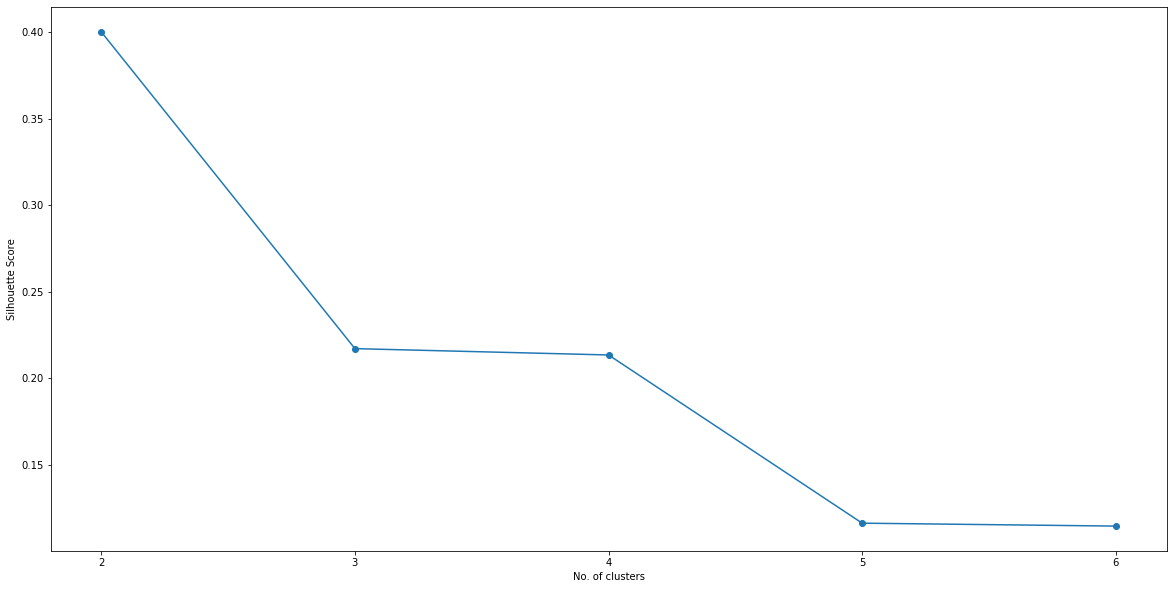

In [151]:
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()


from sklearn.metrics import silhouette_samples, silhouette_score
max_range=7
indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [152]:
# set number of clusters
kclusters = 2

clustering = s_grouped.drop('Neighborhood', 1)
clustering

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clustering)

print(kmeans)
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

s_merged = df

# merge  with toronto_data to add latitude/longitude for each neighborhood
s_merged = s_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')

s_merged.head() # check the last columns!
s_merged = s_merged[s_merged['Cluster Labels'].notna()]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)


In [153]:
# create map

map_clusters = folium.Map(location=[b_latitude, b_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(s_merged['Latitude'], s_merged['Longitude'], s_merged['District'], s_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [154]:
s_merged.loc[s_merged['Cluster Labels'] == 0, s_merged.columns[[0] + list(range(5, s_merged.shape[1]))]]

,Number,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,3,0.0,History Museum,Clothing Store,Restaurant,Farmers Market,Convenience Store,Cosmetics Shop,Country Dance Club,Cultural Center,Dessert Shop,Diner


In [155]:
s_merged.loc[s_merged['Cluster Labels'] == 1, s_merged.columns[[0] + list(range(5, s_merged.shape[1]))]]

,Number,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,1.0,Cocktail Bar,Hotel,Plaza,Boat or Ferry,Bar,Tapas Restaurant,Pizza Place,Spanish Restaurant,Art Gallery,Theater
1,2,1.0,Hotel,Mediterranean Restaurant,Tapas Restaurant,Bakery,Hostel,Bookstore,Cocktail Bar,Boutique,Cosmetics Shop,Spanish Restaurant
3,4,1.0,Hotel,Restaurant,Spanish Restaurant,Bakery,Park,Garden,Italian Restaurant,Diner,Bar,Tram Station
4,5,1.0,Light Rail Station,Convenience Store,National Park,Ice Cream Shop,Building,Plaza,BBQ Joint,Farmers Market,Falafel Restaurant,Exhibit
6,7,1.0,Park,Chinese Restaurant,Spanish Restaurant,Grocery Store,Farmers Market,Farm,Outdoor Sculpture,Plaza,Basketball Court,Soccer Field
7,8,1.0,Baby Store,Castle,Skate Park,Metro Station,Spanish Restaurant,Fried Chicken Joint,Falafel Restaurant,Gym,Cultural Center,Dessert Shop
8,9,1.0,Clothing Store,Cosmetics Shop,Tapas Restaurant,Burger Joint,Spanish Restaurant,Sandwich Place,Café,Fast Food Restaurant,Electronics Store,Women's Store
9,10,1.0,Mediterranean Restaurant,Pizza Place,Bakery,Italian Restaurant,Park,Performing Arts Venue,Plaza,Restaurant,Falafel Restaurant,Brewery
